In [ ]:
import VolSurfaceFunctions as VSF
import pandas as pd
import numpy as np
import yfinance as yf
from functools import partial
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

## Setting

In [ ]:
tickers = ["^N225", "^GSPC", "^HSI"]
df = yf.download(tickers, start = "2013-11-01", end="2023-11-11", ignore_tz=True)["Close"].dropna()
# Order: SPX, HSI, NKY
S1_0 = df.iloc[-1][2] # NKY
S2_0 = df.iloc[-1][0] # SPX
S3_0 = df.iloc[-1][1] # HSI

T = 2
M = 10000 # number of simulations
N = 252 * 2 # number of time steps
dt = T / N


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


## Volatility Surface

In [ ]:
NKY_r_func = VSF.get_r_func("Data Set\\JPY OIS (365).xlsx", 365)
NKY_chains, NKY_table = VSF.get_processed_data("Data Set\\NKY.xlsx", S1_0, NKY_r_func, 250)
NKY_surface = VSF.get_vol_sur_M_all(NKY_chains, NKY_table)
NKY_local_surface = VSF.get_loc_vol_sur_M_all(NKY_chains, NKY_table)
print("NKY completed\n")

HSI_r_func = VSF.get_r_func("Data Set\\HKD OIS (365).xlsx", 365)
HSI_chains, HSI_table = VSF.get_processed_data("Data Set\\HSI.xlsx", S2_0, HSI_r_func, 100)
HSI_surface = VSF.get_vol_sur_M_all(HSI_chains, HSI_table)
HSI_local_surface = VSF.get_loc_vol_sur_M_all(HSI_chains, HSI_table)
print("HSI completed\n")

SPX_r_func = VSF.get_r_func("Data Set\\USD OIS (360).xlsx", 360)
SPX_chains, SPX_table = VSF.get_processed_data("Data Set\\SPX.xlsx", S3_0, SPX_r_func, 25)
SPX_surface = VSF.get_vol_sur_M_all(SPX_chains, SPX_table)
SPX_local_surface = VSF.get_loc_vol_sur_M_all(SPX_chains, SPX_table)
print("SPX completed")

T=0.07397260273972603 processed
T=0.16986301369863013 processed
T=0.2465753424657534 processed
T=0.3232876712328767 processed
T=0.4191780821917808 processed
T=0.4958904109589041 processed
T=0.5917808219178082 processed
T=0.6684931506849315 processed
T=0.7452054794520548 processed
T=0.8410958904109589 processed
T=0.9178082191780822 processed
T=0.9945205479452055 processed
T=1.0904109589041096 processed
T=1.3397260273972602 processed
T=1.5890410958904109 processed
T=2.0876712328767124 processed
NKY completed

T=0.049315068493150684 processed
T=0.12876712328767123 processed
T=0.2191780821917808 processed
T=0.29863013698630136 processed
T=0.37534246575342467 processed
T=0.6273972602739726 processed
T=0.8794520547945206 processed
T=1.1369863013698631 processed
T=1.6273972602739726 processed
T=2.136986301369863 processed
HSI completed

T=0.0547945205479452 processed
T=0.13424657534246576 processed
T=0.22465753424657534 processed
T=0.3041095890410959 processed
T=0.38082191780821917 processed


### Visualization of Vol Surface

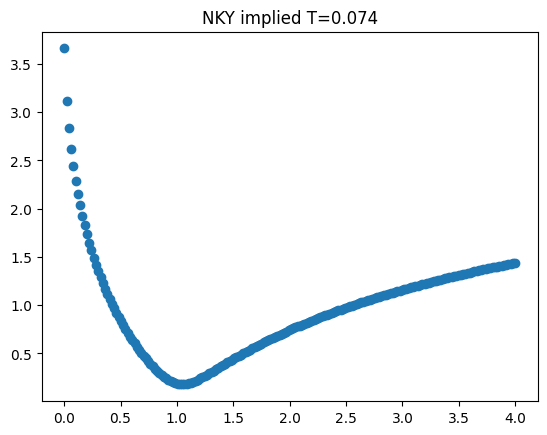

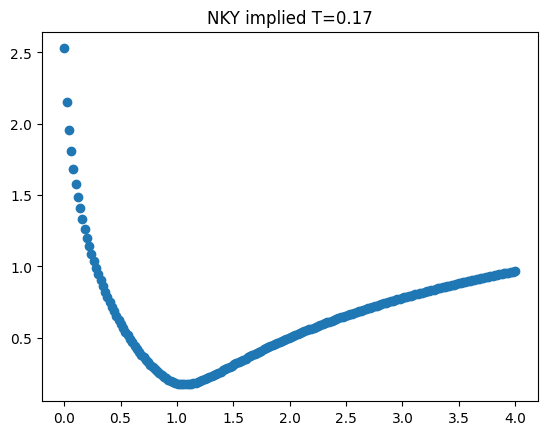

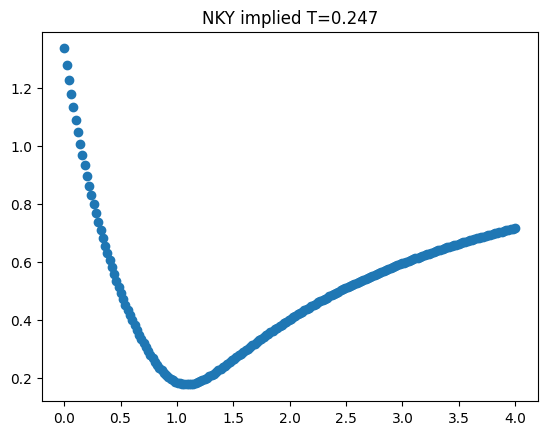

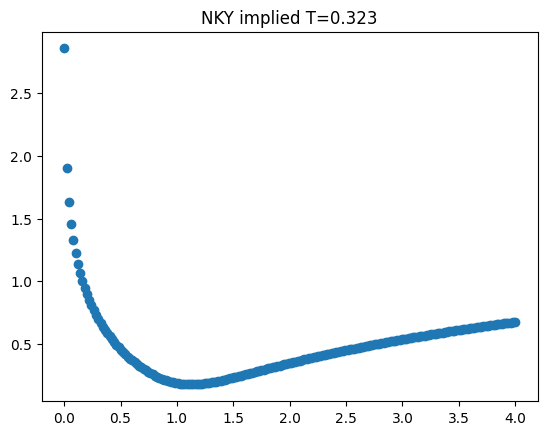

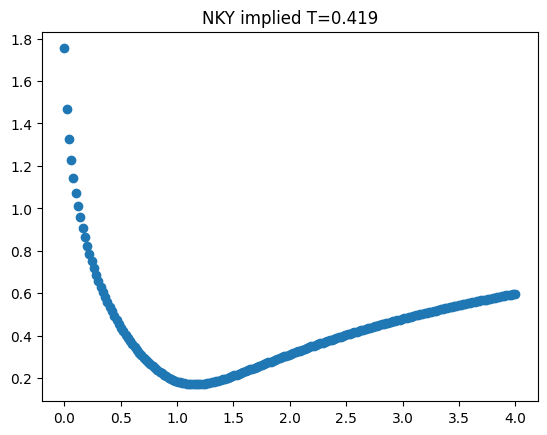

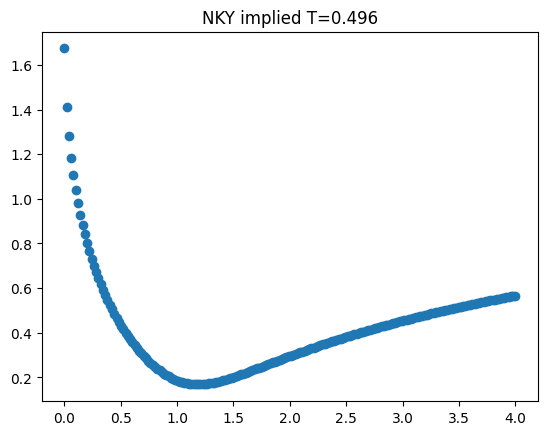

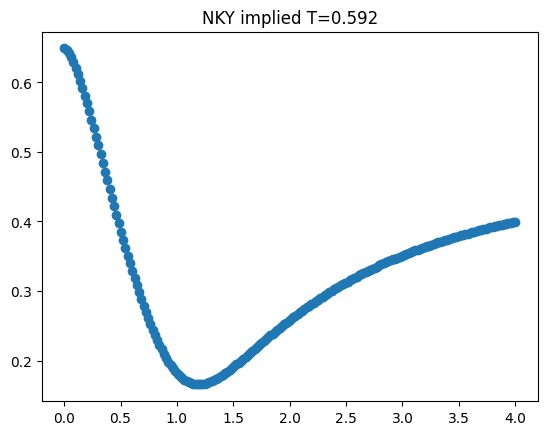

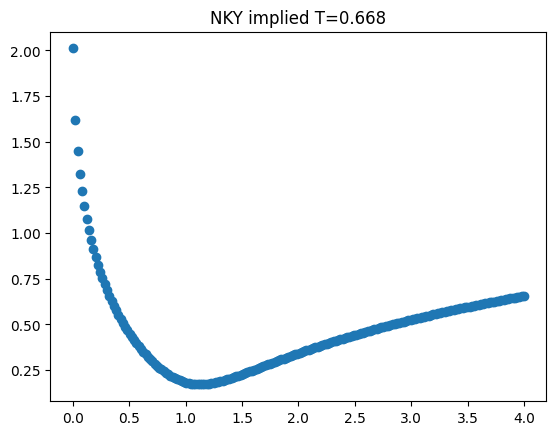

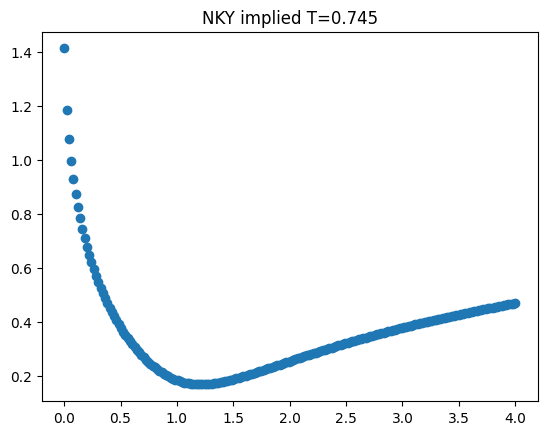

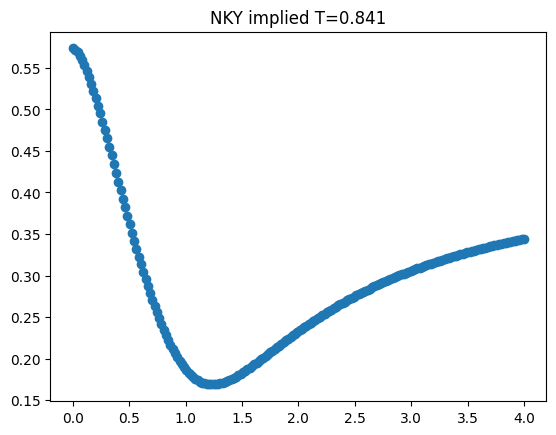

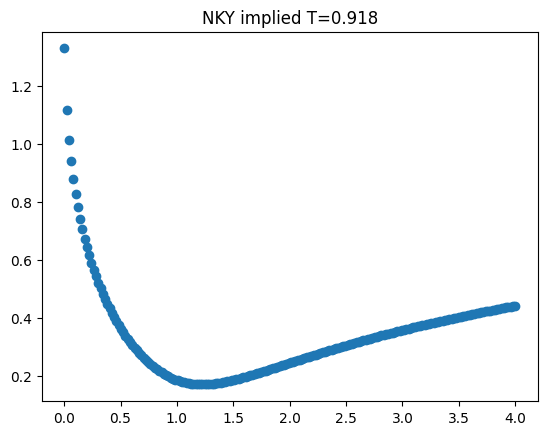

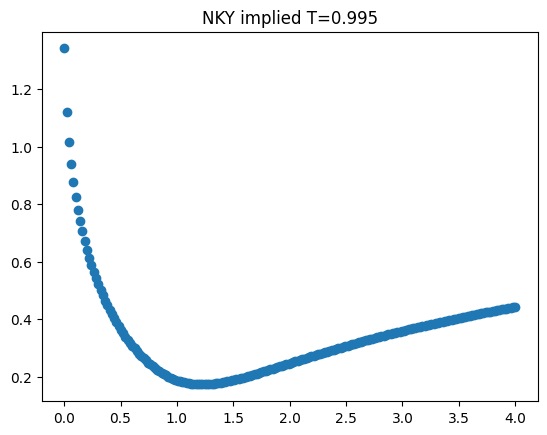

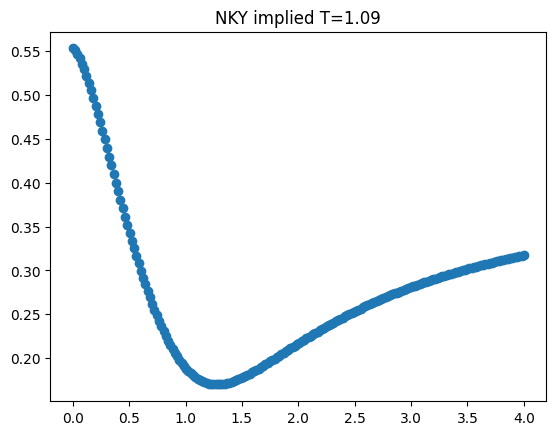

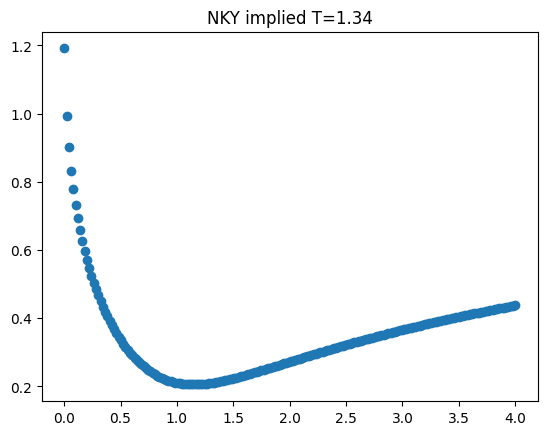

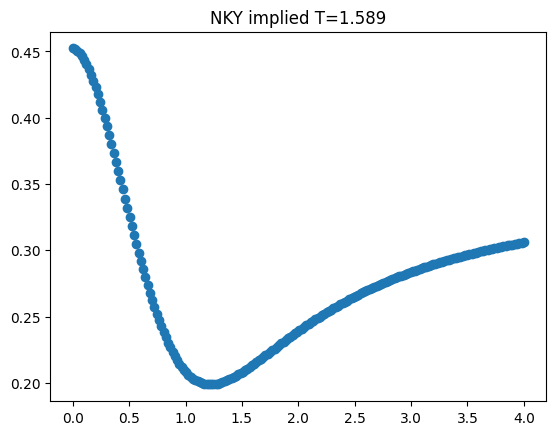

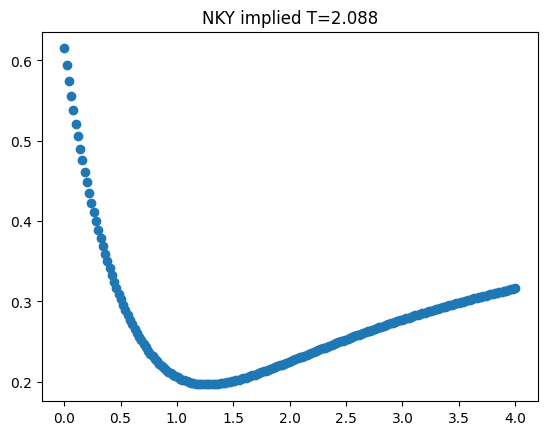

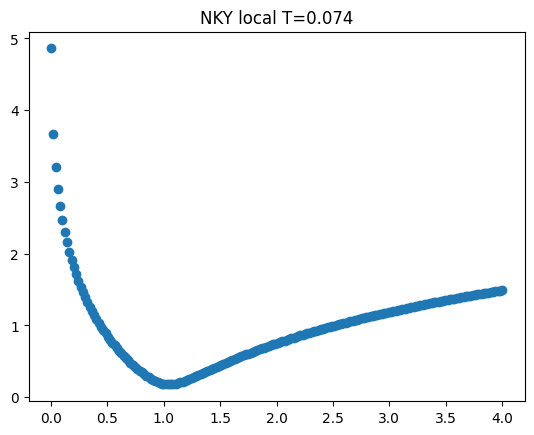

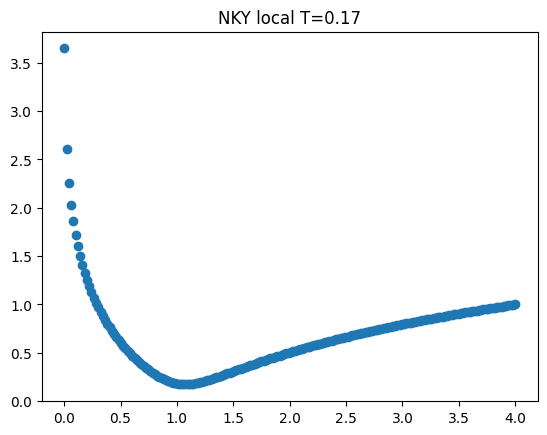

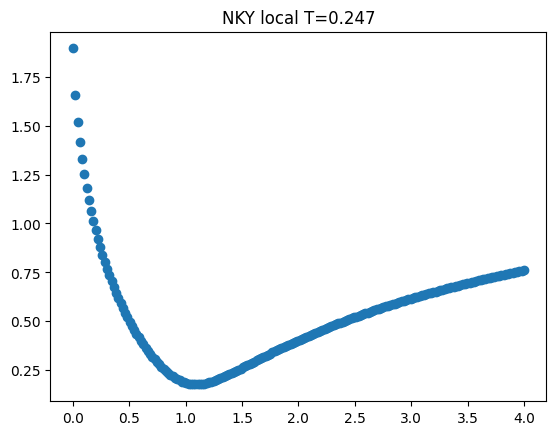

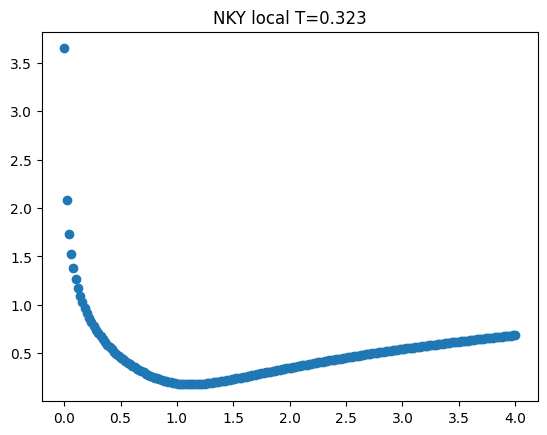

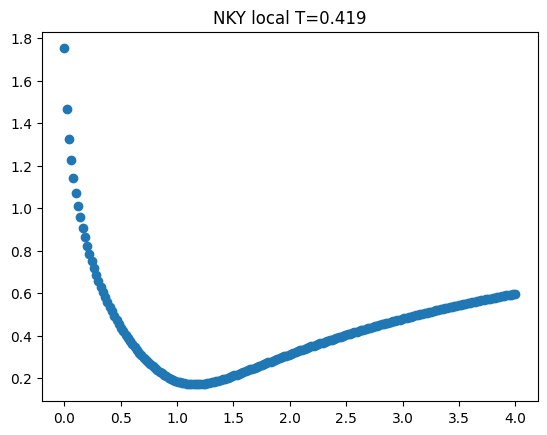

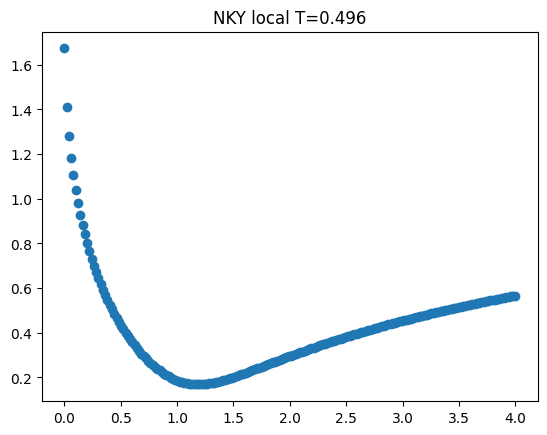

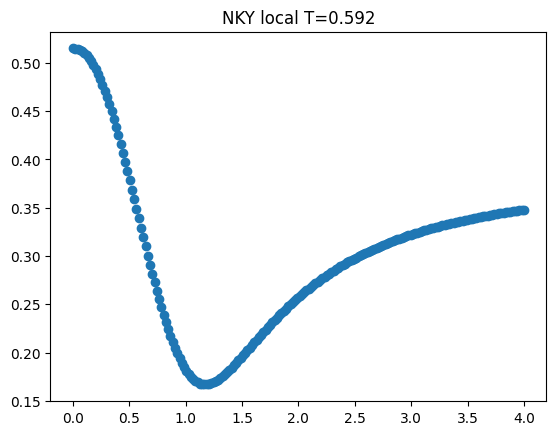

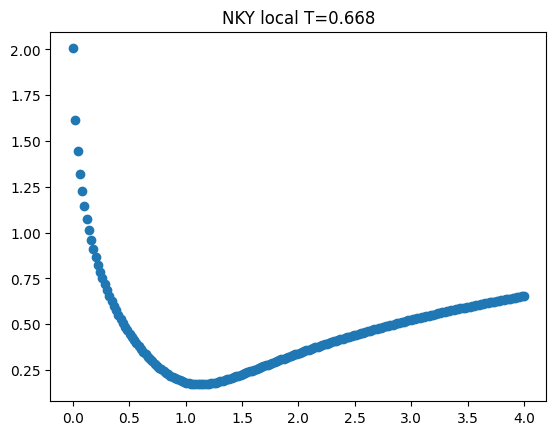

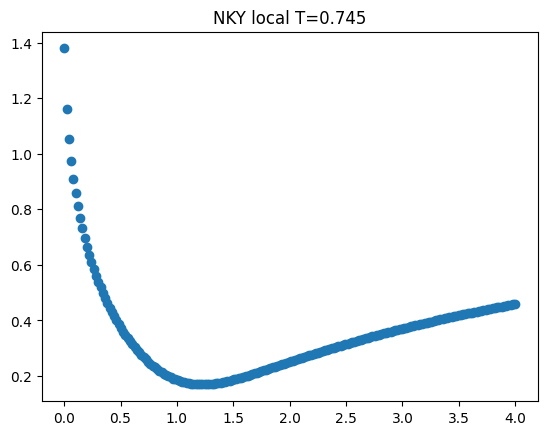

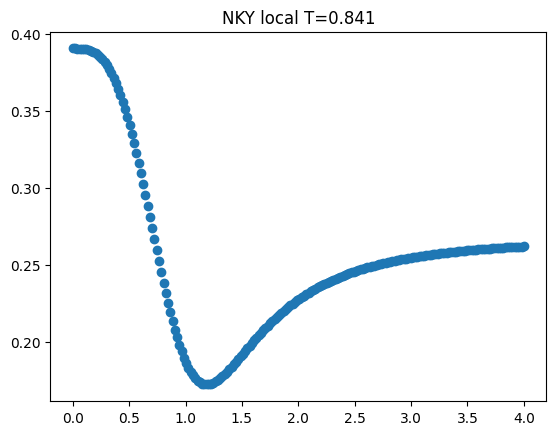

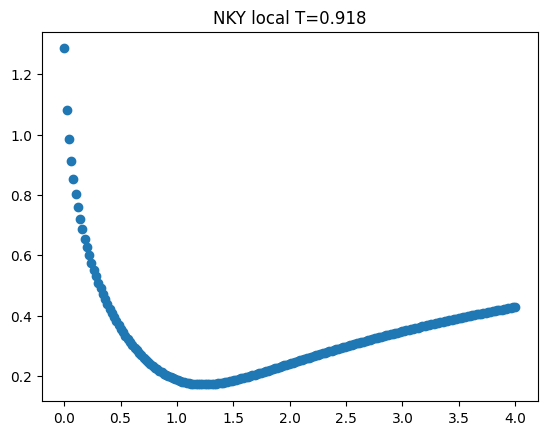

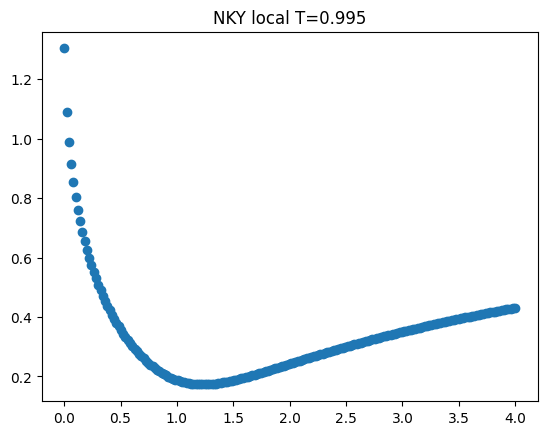

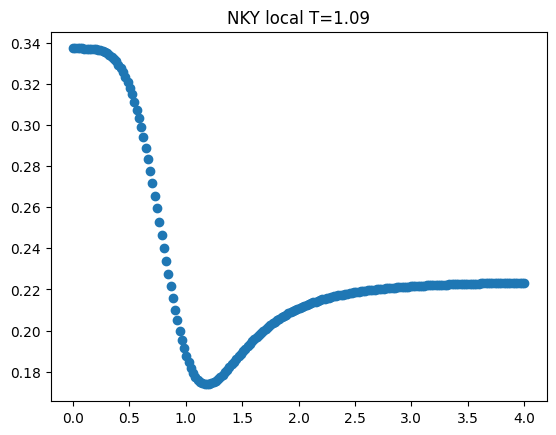

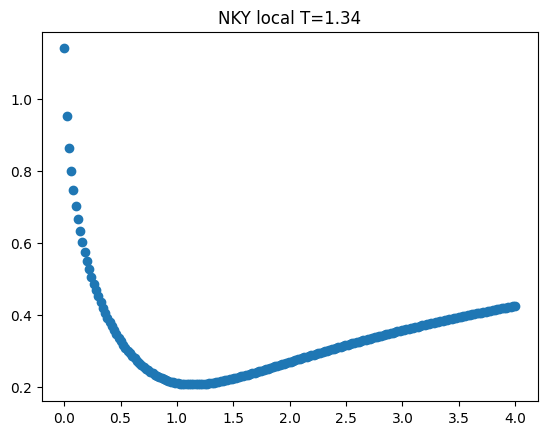

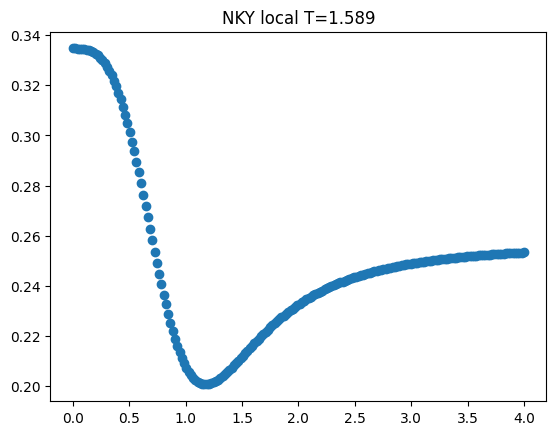

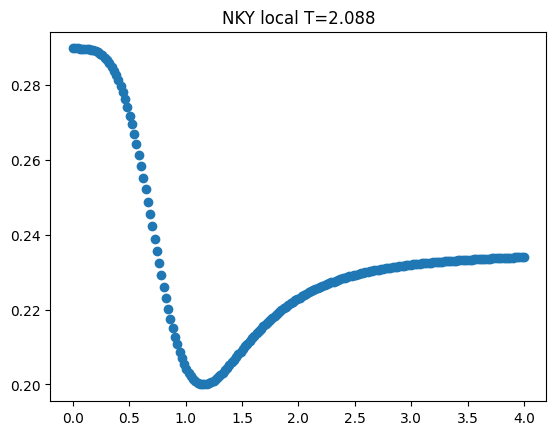

In [13]:
m = np.linspace(.001, 4, 200)
T = np.linspace(.00001, 2, 200)
for _, t in NKY_surface:
    plt.scatter(m, np.sqrt(_(np.log(m))))
    plt.title(f"NKY implied T={round(t, 3)}")
    plt.show()
for _, t in NKY_local_surface:
    plt.scatter(m, np.sqrt(_(np.log(m))))
    plt.title(f"NKY local T={round(t, 3)}")
    plt.show()


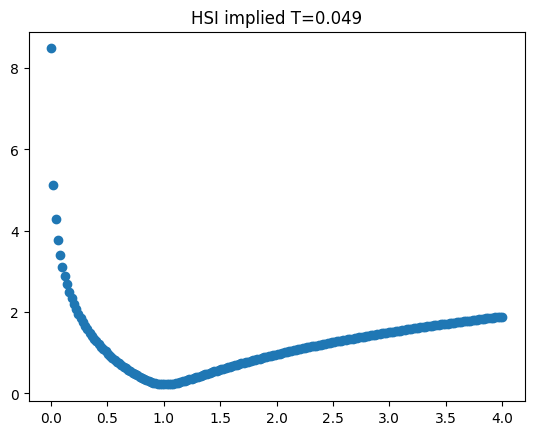

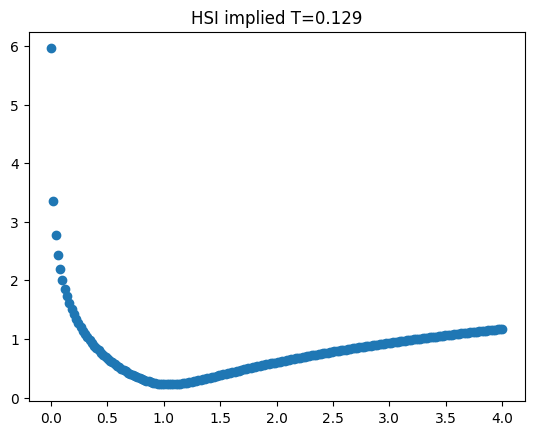

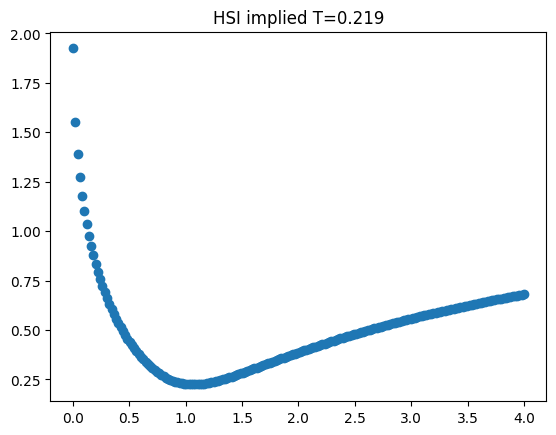

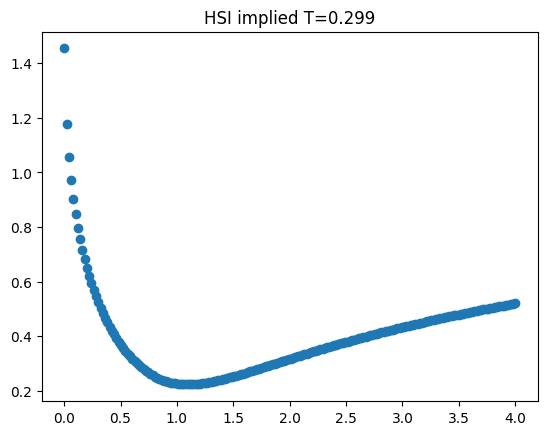

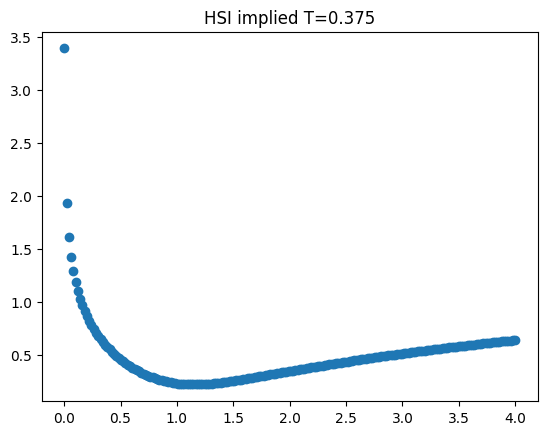

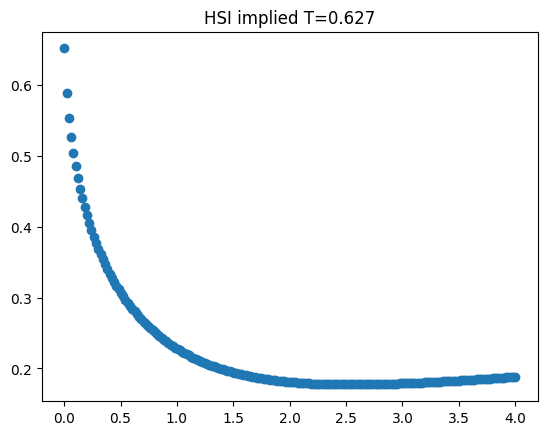

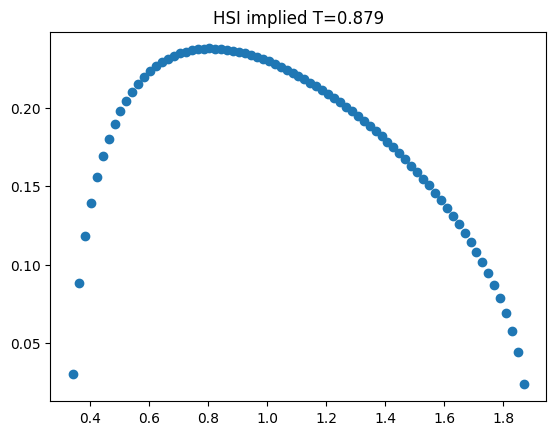

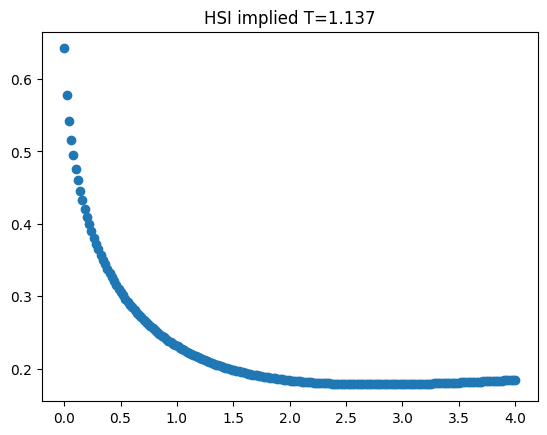

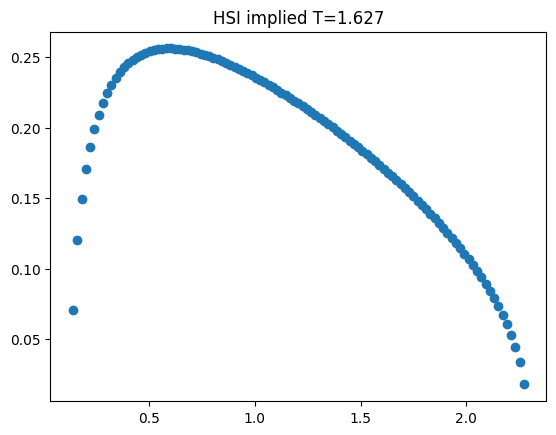

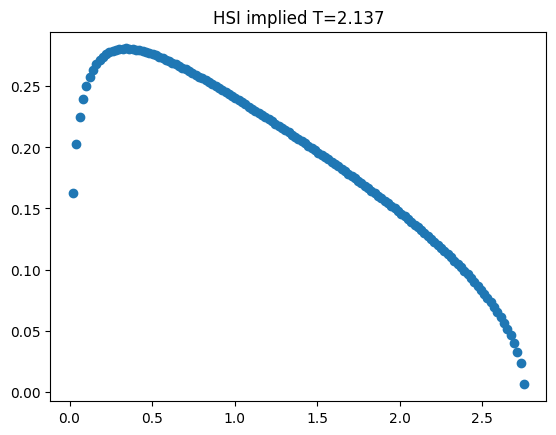

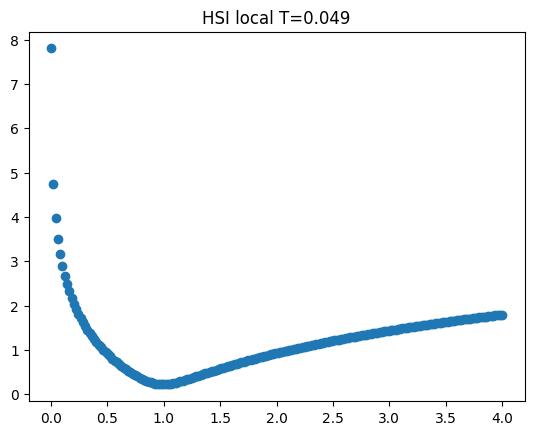

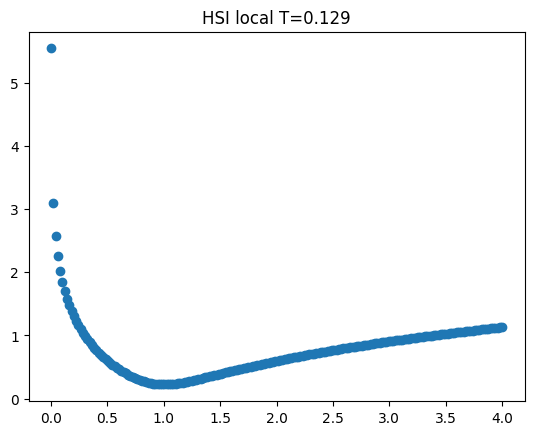

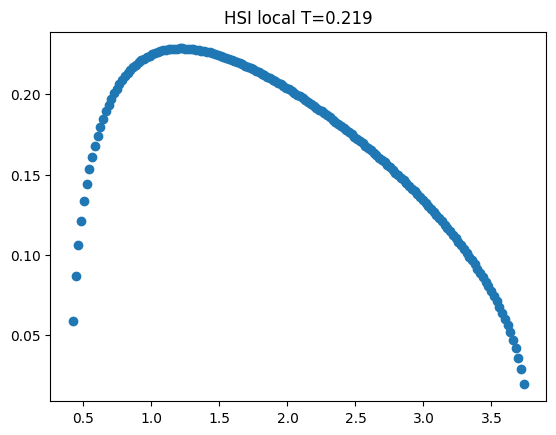

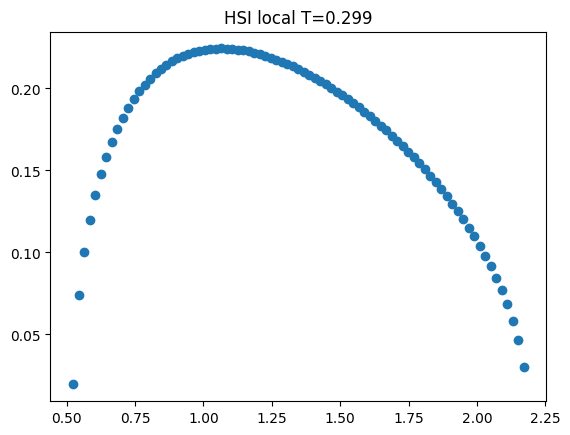

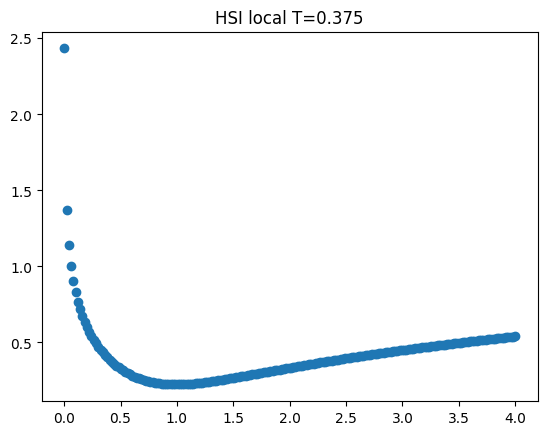

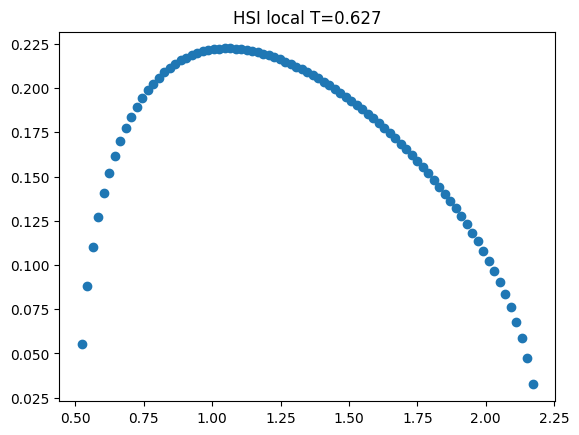

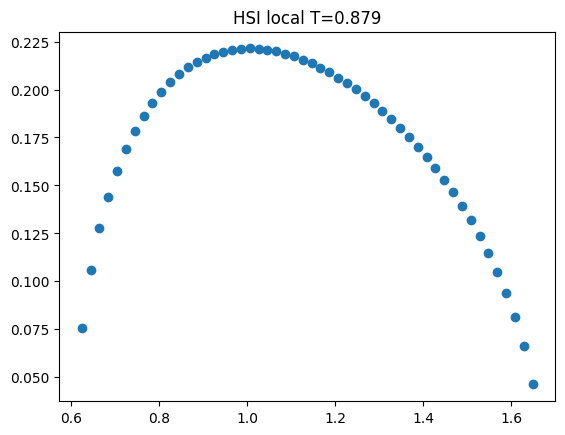

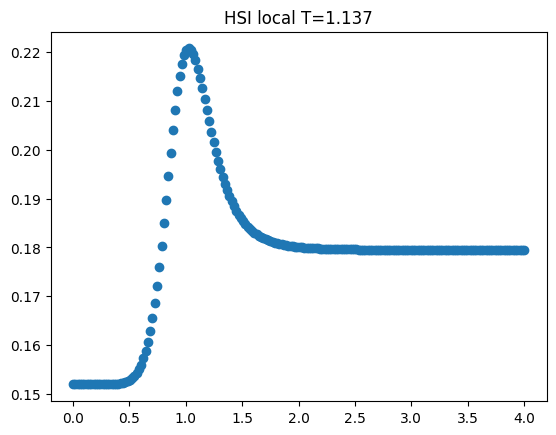

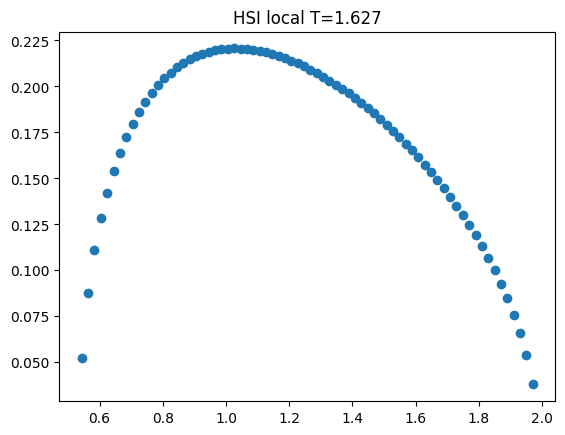

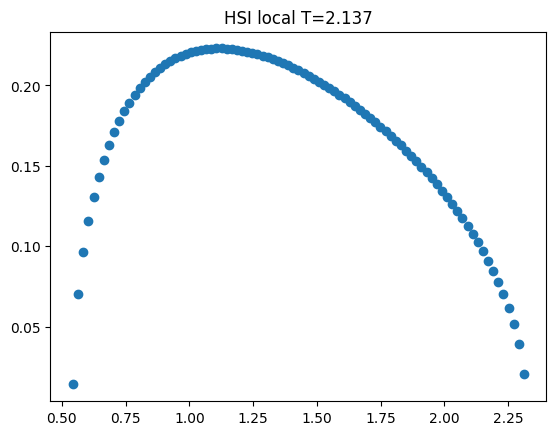

In [14]:
for _, t in HSI_surface:
    plt.scatter(m, np.sqrt(_(np.log(m))))
    plt.title(f"HSI implied T={round(t, 3)}")
    plt.show()
for _, t in HSI_local_surface:
    plt.scatter(m, np.sqrt(_(np.log(m))))
    plt.title(f"HSI local T={round(t, 3)}")
    plt.show()

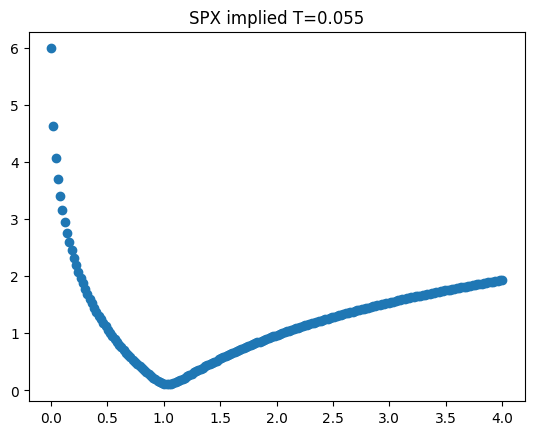

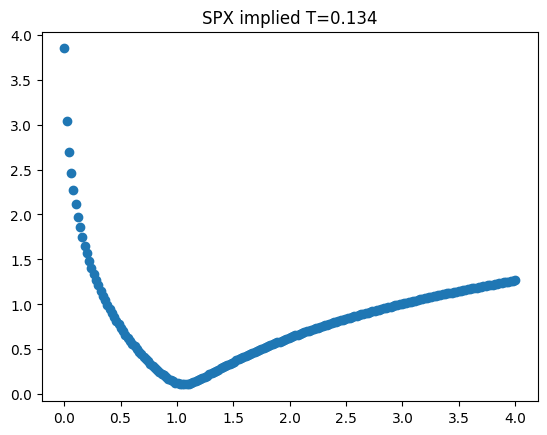

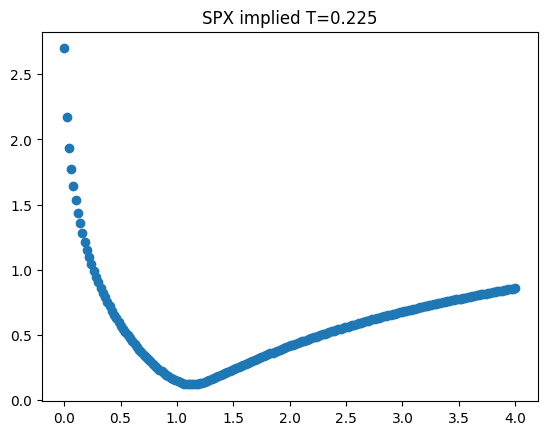

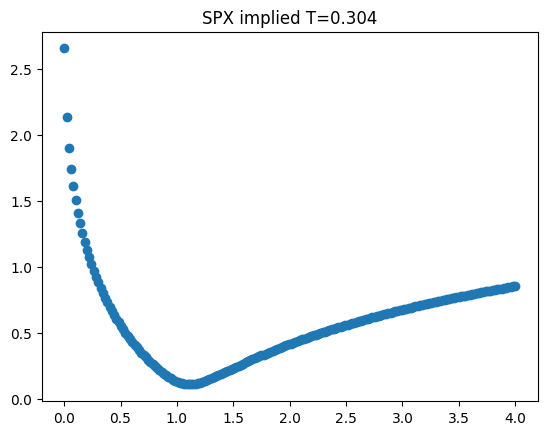

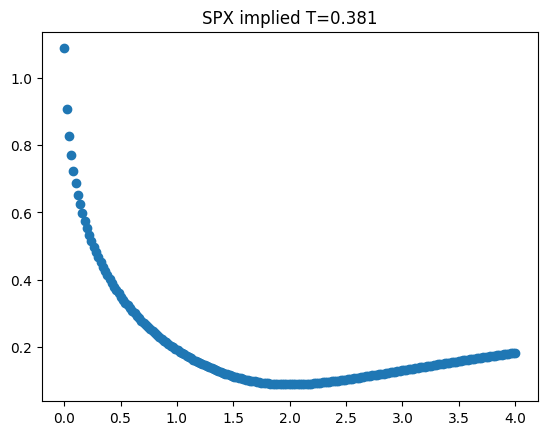

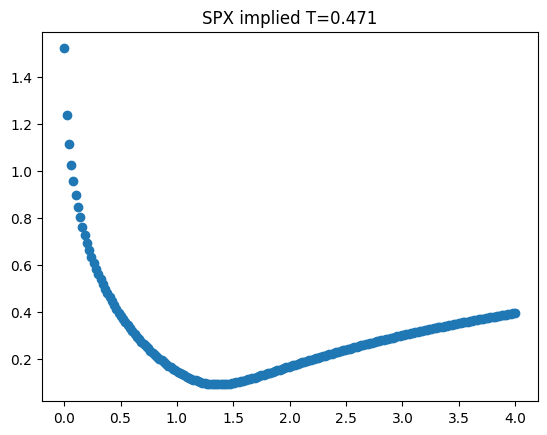

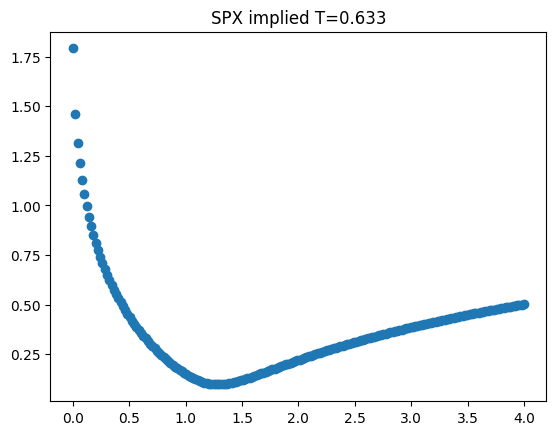

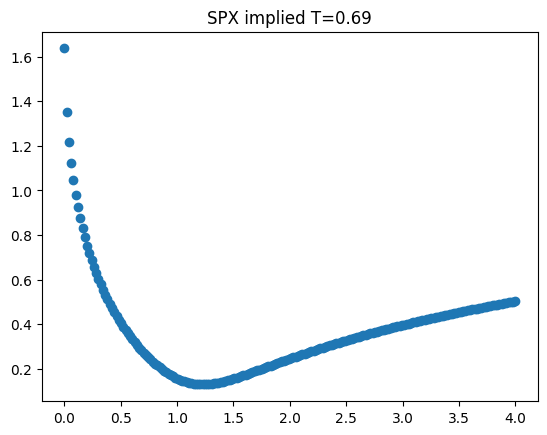

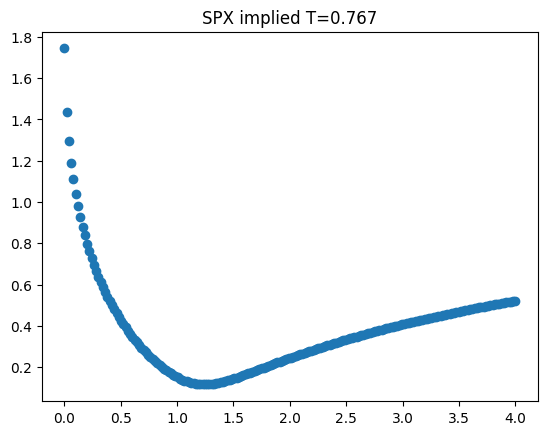

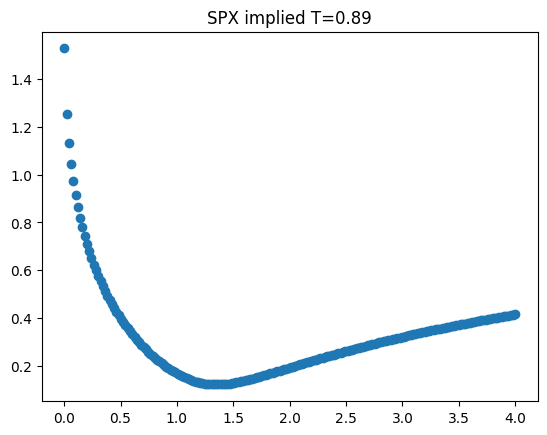

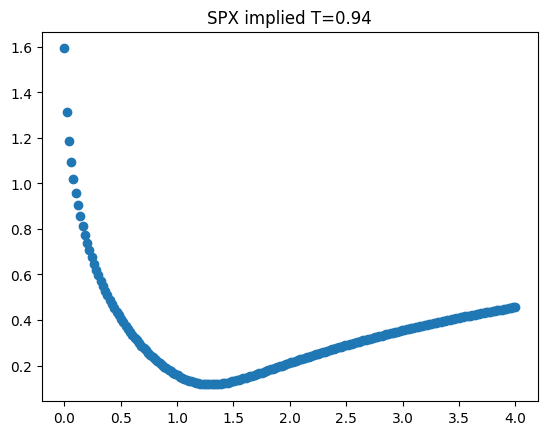

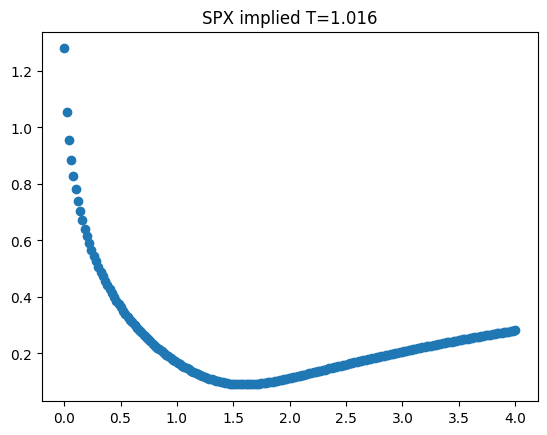

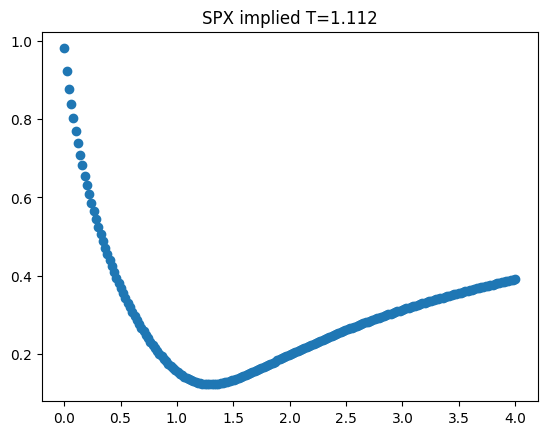

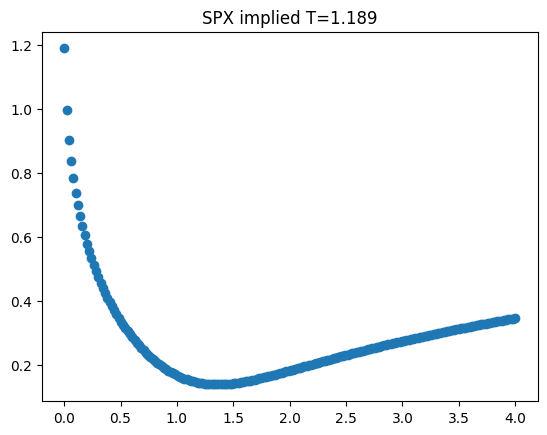

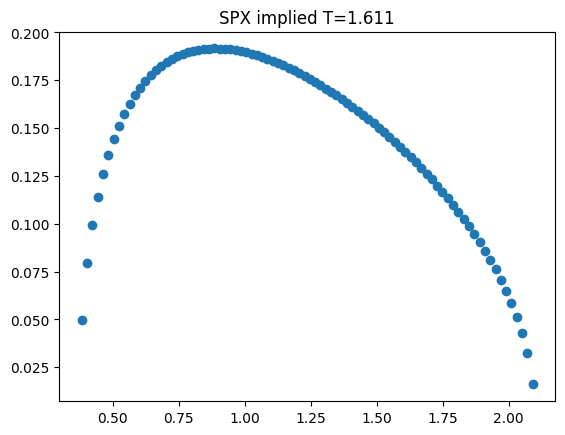

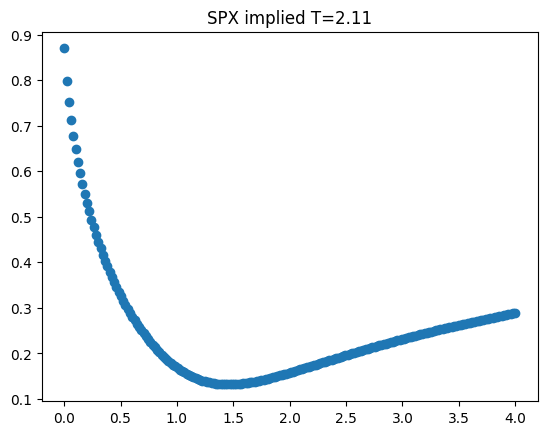

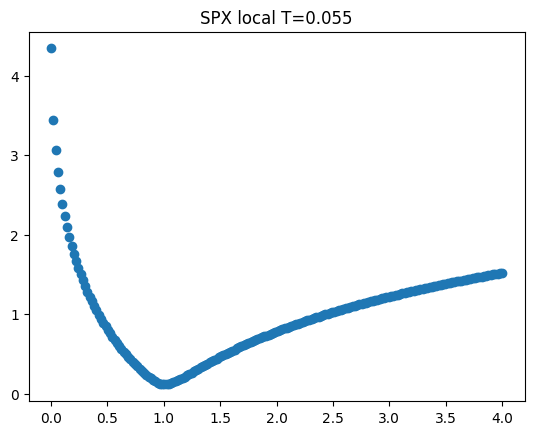

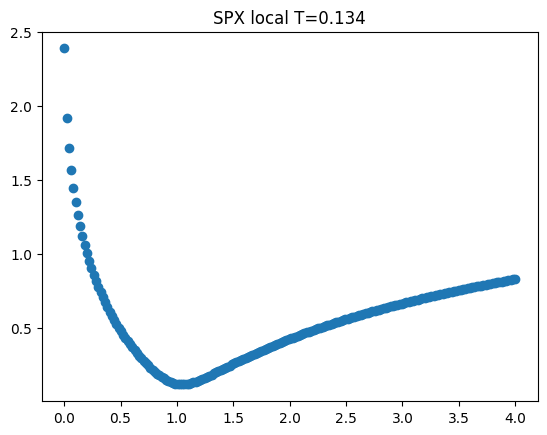

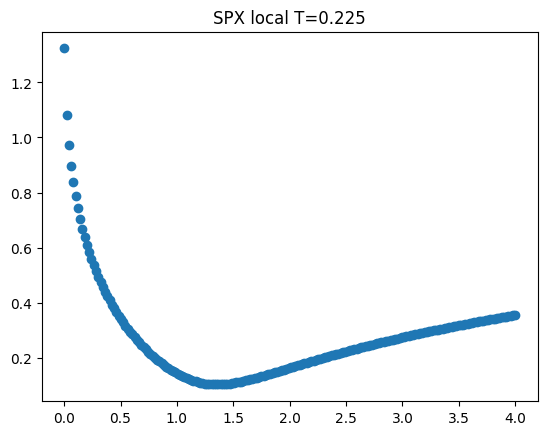

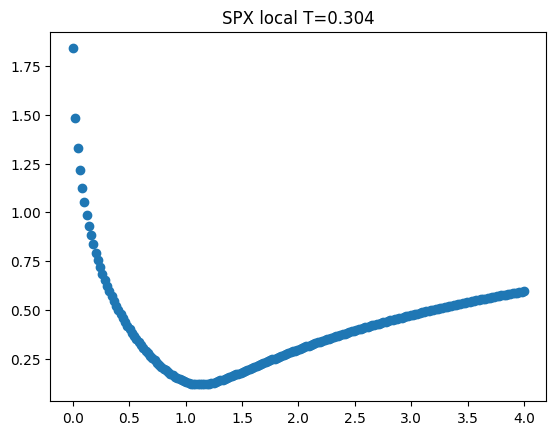

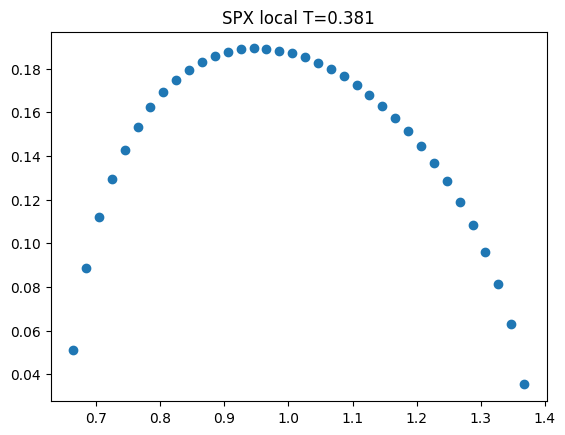

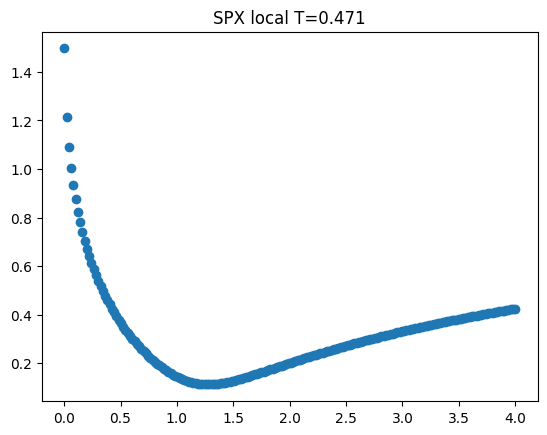

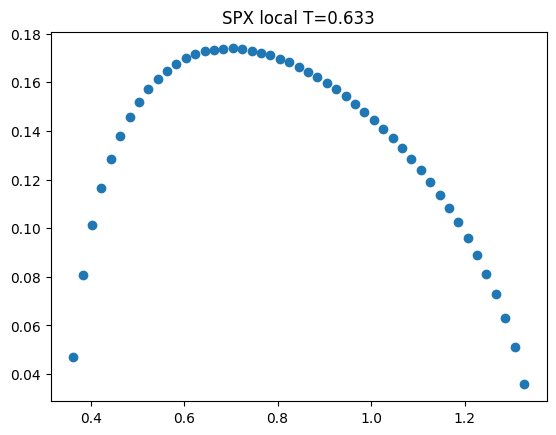

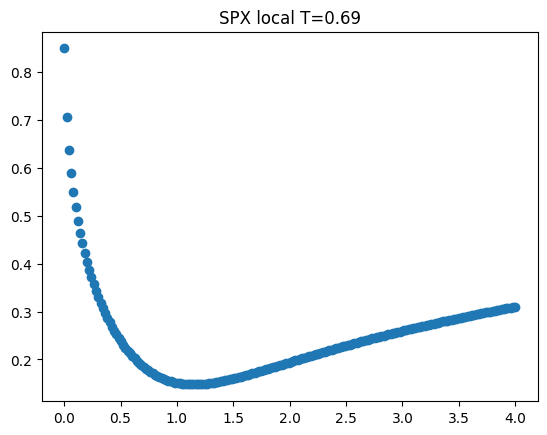

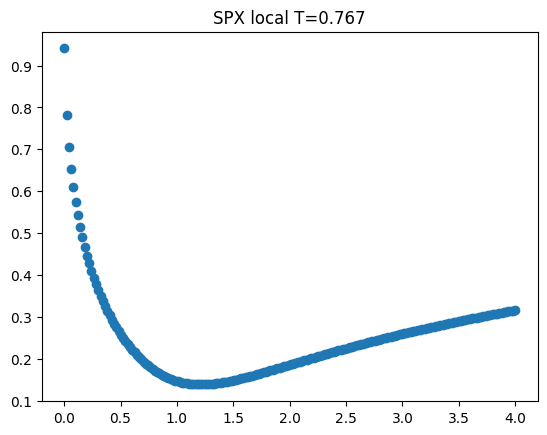

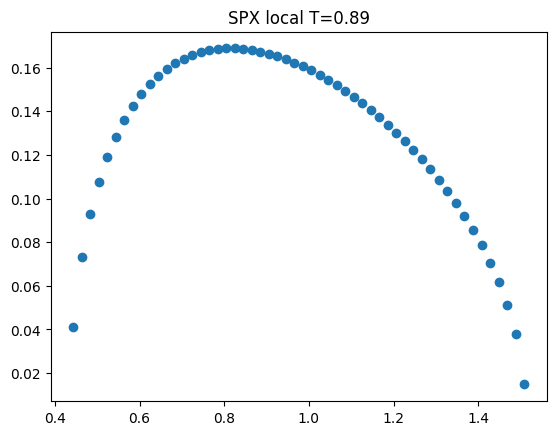

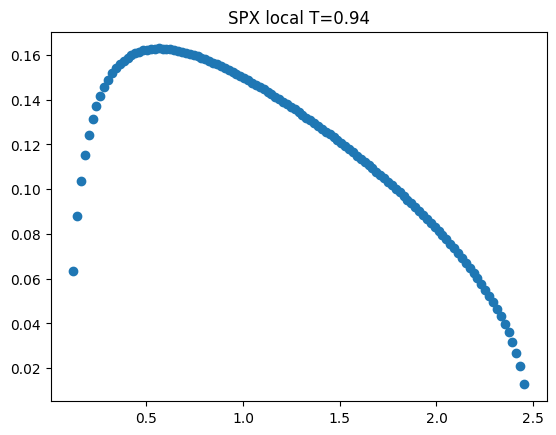

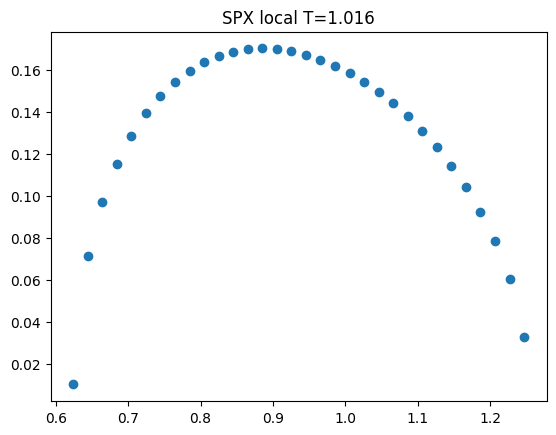

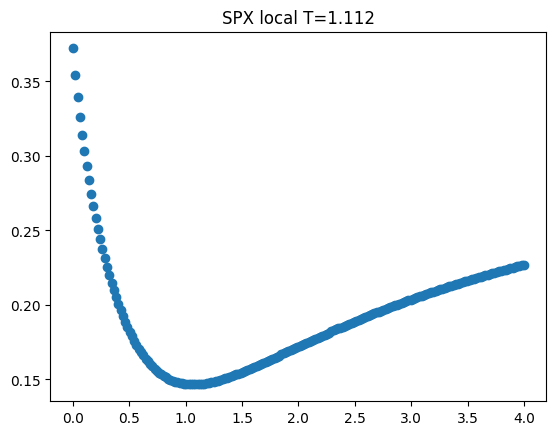

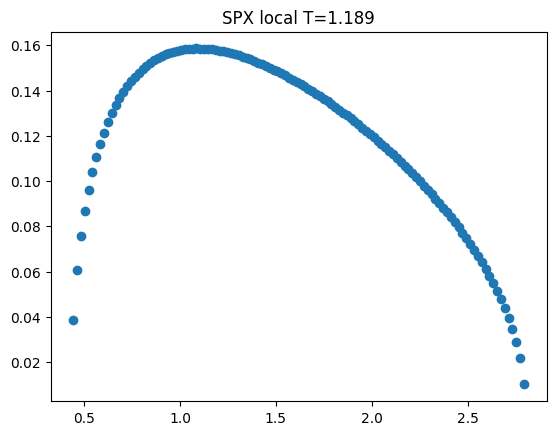

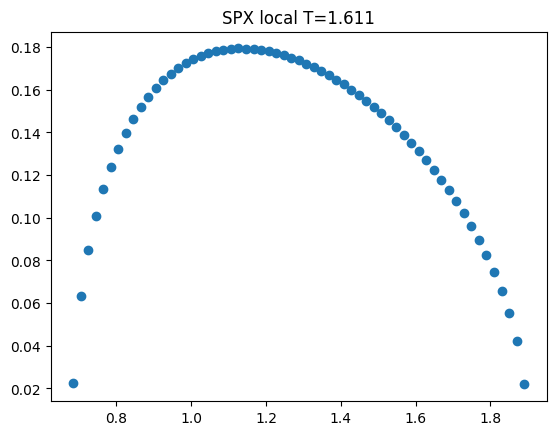

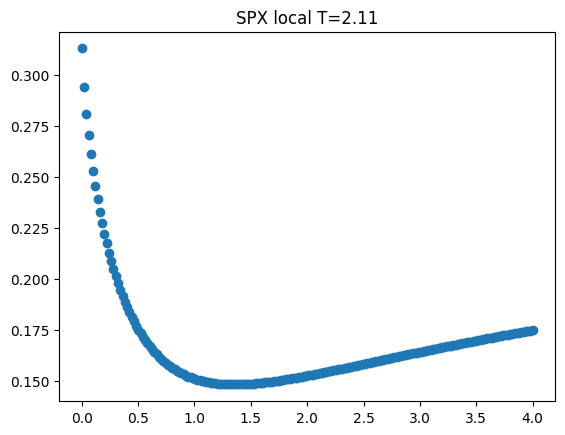

In [15]:
for _, t in SPX_surface:
    plt.scatter(m, np.sqrt(_(np.log(m))))
    plt.title(f"SPX implied T={round(t, 3)}")
    plt.show()
for _, t in SPX_local_surface:
    plt.scatter(m, np.sqrt(_(np.log(m))))
    plt.title(f"SPX local T={round(t, 3)}")
    plt.show()

### Removing Abnormal surfaces

In [17]:
HSI_filter = [0.879, 1.627]
HSI_local_filter = [0.219, 0.299, 0.627, 0.879, 1.627,]
SPX_filter = [1.611]
SPX_local_filter = [0.381, 0.633, 0.89, 0.94, 1.016, 1.189, 1.611]

In [18]:
HSI_surface_reduced = []
HSI_local_surface_reduced = [] 
HSI_T_reduced = []
HSI_local_T_reduced = []
for surface, t in HSI_surface:
    if round(t, 3) not in HSI_filter:
        HSI_surface_reduced.append([surface, t])
        HSI_T_reduced.append(t)
for surface, t in HSI_local_surface:
    if round(t, 3) not in HSI_local_filter:
        HSI_local_surface_reduced.append([surface, t])
        HSI_local_T_reduced.append(t)
HSI_table_reduced = HSI_table.loc[HSI_T_reduced]
HSI_local_table_reduced = HSI_table.loc[HSI_local_T_reduced]

In [19]:
SPX_surface_reduced = []
SPX_local_surface_reduced = [] 
SPX_T_reduced = []
SPX_local_T_reduced = []
for surface, t in SPX_surface:
    if round(t, 3) not in SPX_filter:
        SPX_surface_reduced.append([surface, t])
        SPX_T_reduced.append(t)
for surface, t in SPX_local_surface:
    if round(t, 3) not in SPX_local_filter:
        SPX_local_surface_reduced.append([surface, t])
        SPX_local_T_reduced.append(t)
SPX_table_reduced = SPX_table.loc[SPX_T_reduced]
SPX_local_table_reduced = SPX_table.loc[SPX_local_T_reduced]

## Fit Volatility Surface

In [20]:
NKY_surface_T_cubic = pd.DataFrame(np.sqrt(VSF.get_IV_M_T_Cubic(NKY_surface, np.log(m), T)), T, m)
NKY_surface_T_cubic.to_excel("NKY_surface_T_cubic.xlsx")
NKY_surface_T_linear = pd.DataFrame(np.sqrt(VSF.get_IV_M_T_Linear(NKY_surface, np.log(m), T)), T, m)
NKY_surface_T_linear.to_excel("NKY_surface_T_linear.xlsx")
NKY_local_surface_T_cubic = pd.DataFrame(np.sqrt(VSF.get_IV_M_T_Cubic(NKY_local_surface, np.log(m), T)), T, m)
NKY_local_surface_T_cubic.to_excel("NKY_local_surface_T_cubic.xlsx")
NKY_local_surface_T_linear = pd.DataFrame(np.sqrt(VSF.get_IV_M_T_Linear(NKY_local_surface, np.log(m), T)), T, m)
NKY_local_surface_T_linear.to_excel("NKY_local_surface_T_linear.xlsx")

HSI_surface_T_cubic = pd.DataFrame(np.sqrt(VSF.get_IV_M_T_Cubic(HSI_surface_reduced, np.log(m), T)), T, m)
HSI_surface_T_cubic.to_excel("HSI_surface_T_cubic.xlsx")
HSI_surface_T_linear = pd.DataFrame(np.sqrt(VSF.get_IV_M_T_Linear(HSI_surface_reduced, np.log(m), T)), T, m)
HSI_surface_T_linear.to_excel("HSI_surface_T_linear.xlsx")
HSI_local_surface_T_cubic = pd.DataFrame(np.sqrt(VSF.get_IV_M_T_Cubic(HSI_local_surface_reduced, np.log(m), T)), T, m)
HSI_local_surface_T_cubic.to_excel("HSI_local_surface_T_cubic.xlsx")
HSI_local_surface_T_linear = pd.DataFrame(np.sqrt(VSF.get_IV_M_T_Linear(HSI_local_surface_reduced, np.log(m), T)), T, m)
HSI_local_surface_T_linear.to_excel("HSI_local_surface_T_linear.xlsx")


SPX_surface_T_cubic = pd.DataFrame(np.sqrt(VSF.get_IV_M_T_Cubic(SPX_surface_reduced, np.log(m), T)), T, m)
SPX_surface_T_cubic.to_excel("SPX_surface_T_cubic.xlsx")
SPX_surface_T_linear = pd.DataFrame(np.sqrt(VSF.get_IV_M_T_Linear(SPX_surface_reduced, np.log(m), T)), T, m)
SPX_surface_T_linear.to_excel("SPX_surface_T_linear.xlsx")
SPX_local_surface_T_cubic = pd.DataFrame(np.sqrt(VSF.get_IV_M_T_Cubic(SPX_local_surface_reduced, np.log(m), T)), T, m)
SPX_local_surface_T_cubic.to_excel("SPX_local_surface_T_cubic.xlsx")
SPX_local_surface_T_linear = pd.DataFrame(np.sqrt(VSF.get_IV_M_T_Linear(SPX_local_surface_reduced, np.log(m), T)), T, m)
SPX_local_surface_T_linear.to_excel("SPX_local_surface_T_linear.xlsx")


NKY_local_surface_T_cubic_2 = pd.DataFrame(np.sqrt(VSF.get_local_vol(NKY_surface, np.log(m), T)), T, m)
NKY_local_surface_T_cubic_2.to_excel("NKY_local_surface_T_cubic_2.xlsx")
HSI_local_surface_T_cubic_2 = pd.DataFrame(np.sqrt(VSF.get_local_vol(HSI_surface_reduced, np.log(m), T)), T, m)
HSI_local_surface_T_cubic_2.to_excel("HSI_local_surface_T_cubic_2.xlsx")
SPX_local_surface_T_cubic_2 = pd.DataFrame(np.sqrt(VSF.get_local_vol(SPX_surface_reduced, np.log(m), T)), T, m)
SPX_local_surface_T_cubic_2.to_excel("SPX_local_surface_T_cubic_2.xlsx")


NKY_local_surface_T_linear_2 = pd.DataFrame(np.sqrt(VSF.get_local_vol(NKY_surface, np.log(m), T, False)), T, m)
NKY_local_surface_T_linear_2.to_excel("NKY_local_surface_T_linear_2.xlsx")
HSI_local_surface_T_linear_2 = pd.DataFrame(np.sqrt(VSF.get_local_vol(HSI_surface_reduced, np.log(m), T, False)), T, m)
HSI_local_surface_T_linear_2.to_excel("HSI_local_surface_T_linear_2.xlsx")
SPX_local_surface_T_linear_2 = pd.DataFrame(np.sqrt(VSF.get_local_vol(SPX_surface_reduced, np.log(m), T, False)), T, m)
SPX_local_surface_T_linear_2.to_excel("SPX_local_surface_T_linear_2.xlsx")

In [23]:
nky_q = CubicSpline(NKY_table.index, NKY_table["q"])
def NKY_q(T):
    n = nky_q(T).shape[0]
    return np.maximum(np.zeros(n), nky_q(T))

hsi_q = CubicSpline(HSI_local_table_reduced.index, HSI_local_table_reduced["q"])
def HSI_q(T):
    n = hsi_q(T).shape[0]
    return np.maximum(np.zeros(n), hsi_q(T))

spx_q = CubicSpline(SPX_local_table_reduced.index, SPX_local_table_reduced["q"])
def SPX_q(T):
    n = spx_q(T).shape[0]
    return np.maximum(np.zeros(n), spx_q(T))

## Simulation

In [ ]:
def sim_path(raw_ts):
    np.random.seed(1)
    W1 = np.random.normal(size=(M,N))

    np.random.seed(2)
    W2 = np.random.normal(size=(M,N))

    np.random.seed(3)
    W3 = np.random.normal(size=(M,N))

    raw_ts = raw_ts.dropna()
    daily_return = np.log(raw_ts.shift(-1)/raw_ts).dropna()
    corr_matrix = daily_return.corr()
    cholesky_factor = np.linalg.cholesky(corr_matrix)
    Z1 = cholesky_factor[0,0] * W1
    Z2 = cholesky_factor[1,0] * W1 + cholesky_factor[1,1] * W2
    Z3 = cholesky_factor[2,0] * W1 + cholesky_factor[2,1] * W2 + cholesky_factor[2,2] * W3
    return Z1, Z2, Z3

def index_proj(S_0, M, N, r_func, q_func, local_vol, T, Z):
    min_sig = 1
    index_t = np.full((M,N+1), S_0)
    index_F = S_0*np.exp((r_func(T)-q_func(T))*T)
    for j in range(1, index_t.shape[1]):
        r = (T[j]*r_func(T[j])-T[j-1]*r_func(T[j-1]))/(1/252)
        sig2 = VSF.get_IV_M_T_Linear(local_vol, np.log(index_F[j-1]/index_t[:, j-1]), T[j-1])
        temp = np.where(sig2>=0, 1, 0)
        try:
            min_sig = min(min_sig, np.min(sig2[sig2>=0]))
        except:
            pass 
        temp2 = np.full((M,),min_sig)
        sig = np.sqrt(sig2*temp+temp2*(1-temp))
        index_t[:, j] = index_t[:, j-1]*np.exp((r-sig**2/2)/252+sig*Z[:, j-1]*np.sqrt(1/252))
    return index_t

t = np.linspace(0, 2, N+1)
Z1, Z2, Z3 = sim_path(df)
NKY_t = index_proj(32568.11, 10000, N, NKY_r_func, NKY_q, NKY_local_surface, t, Z3)
HSI_t = index_proj(17203.26, 10000, N, HSI_r_func, HSI_q, HSI_local_surface_reduced, t, Z2)
SPX_t = index_proj(4415.24, 10000, N, SPX_r_func, SPX_q, SPX_local_surface_reduced, t, Z1)


## Pricing

In [29]:
R_t_NKY = NKY_t/NKY_t[0, 0]
R_t_HSI = HSI_t/HSI_t[0, 0]
R_t_SPX = SPX_t/SPX_t[0, 0]

R_t_All = np.array([R_t_NKY, R_t_SPX, R_t_HSI])
R_t_laggard = np.min(R_t_All, axis=0)
min_laggard_daily = np.min(R_t_laggard, axis=1)

laggard_semi_annually = R_t_laggard[:,[126,252,378,504]]
knock_in_vector = (min_laggard_daily <= 0.5).astype(int)
knock_out_vectors = (laggard_semi_annually >= 1.1).astype(int)

In [32]:
def get_autocallable_price(laggard_semi_annually, knock_in_vector, knock_out_vectors, CS_pct, r, max_int, min_int):
    # calculate interest value first
    max_interest_indicator = laggard_semi_annually >= CS_pct # true = max, false = min, dim=(1000,4)
    KO_indicator_semi_annually = np.hstack((np.ones((10000,1)), np.cumprod(1 - knock_out_vectors, axis=1)[:,:-1])) # dim=(1000,4); if first KO at time i, all entries on the same row with column index > i will also be 0
    discount_vector = np.exp(-np.array([r(.5)*.5,r(1),r(1.5)*1.5,r(2)*2])).reshape(4,1)
    
    interest = (10000 * (max_int/2 * max_interest_indicator + min_int/2 * (1 - max_interest_indicator)) * KO_indicator_semi_annually).dot(discount_vector)  
    
    # calculate KO redemption
    KO_indicator = np.any(knock_out_vectors, axis=1)
    
    # find the first time point satisfying KO requirement
    mask = knock_out_vectors==1
    first_KO_time = (np.where(mask.any(axis=1), mask.argmax(axis=1), 0) + 1) / 2
    KO_redemption = np.dot(KO_indicator, np.exp(-r(first_KO_time) * first_KO_time)) * 10000
    
    # calculate final redemption
    redemption = np.dot((1 - KO_indicator), 10000 * (np.minimum(1, R_t_laggard[:,504]) * knock_in_vector + 1 * (1 - knock_in_vector)))
    redemption = redemption * np.exp(-r(2)*2)
    
    return (np.sum(interest) + np.sum(KO_redemption) + np.sum(redemption)) / 10000

In [35]:
Summary = pd.DataFrame(index=np.linspace(.02, .20, 25), columns=np.linspace(.0001, .01, 25))
for i in Summary.index:
    for j in Summary.columns:
        autocallable_price_wrt_CS = partial(get_autocallable_price, laggard_semi_annually=laggard_semi_annually, knock_in_vector=knock_in_vector, knock_out_vectors=knock_out_vectors, r=SPX_r_func, max_int=i, min_int=j)
        CS = 1
        count1 = 0
        count2 = 0
        if autocallable_price_wrt_CS(CS_pct=CS) > 9800:
            while autocallable_price_wrt_CS(CS_pct=CS) > 9800 and count1 <100:
                CS = CS + 0.01
                count1+=1
        else:
            while autocallable_price_wrt_CS(CS_pct=CS) <= 9800 and count2 <100:
                CS = CS - 0.01
                count2+=1
        if CS > 1:
            lower = 1
            upper = CS
        else:
            lower = CS
            upper = 1

        temp = (lower + upper) / 2
    
        while abs(autocallable_price_wrt_CS(CS_pct=temp) - 9800) > .1 and count1<100 and count2<100: # set the tolerance level to 0.00001
            if autocallable_price_wrt_CS(CS_pct=temp) - 9800 > 0:
                lower = temp
            else:
                upper = temp
            temp = (lower + upper) / 2
        if count1>=100 or count2>=100:
            Summary.loc[i, j] = "No result"
        else:
            Summary.loc[i, j] = temp

In [36]:
Summary

,0.000100,0.000513,0.000925,0.001338,0.001750,0.002162,0.002575,0.002988,0.003400,0.003813,...,0.006288,0.006700,0.007113,0.007525,0.007938,0.008350,0.008763,0.009175,0.009588,0.010000
0.0200,No result,No result,No result,No result,No result,No result,No result,No result,No result,No result,...,No result,No result,No result,No result,No result,No result,No result,No result,No result,No result
0.0275,No result,No result,No result,No result,No result,No result,No result,No result,No result,No result,...,No result,No result,No result,No result,No result,No result,No result,No result,No result,No result
0.0350,No result,No result,No result,No result,No result,No result,No result,No result,No result,No result,...,No result,No result,No result,No result,No result,No result,No result,No result,No result,No result
0.0425,No result,No result,No result,No result,No result,No result,No result,No result,No result,No result,...,No result,No result,No result,No result,No result,No result,No result,No result,No result,No result
0.0500,0.695752,0.696357,0.697114,0.697871,0.698477,0.699385,0.700146,0.701172,0.701904,0.70293,...,0.70791,0.708643,0.709668,0.710566,0.711416,0.712266,0.713115,0.714036,0.715098,0.715947
0.0575,0.772695,0.773369,0.77438,0.775278,0.776177,0.777187,0.778254,0.779209,0.780107,0.780967,...,0.78623,0.787197,0.788271,0.789238,0.790205,0.791436,0.792461,0.793589,0.794717,0.795947
0.0650,0.814546,0.815381,0.816216,0.817144,0.818071,0.819045,0.819834,0.820879,0.821978,0.822944,...,0.828789,0.8298,0.830789,0.831826,0.832822,0.833943,0.834773,0.835811,0.83689,0.837969
0.0725,0.84375,0.844531,0.845391,0.846094,0.84707,0.848008,0.848789,0.84957,0.850403,0.851318,...,0.856519,0.857397,0.858276,0.859229,0.860308,0.861128,0.862187,0.863418,0.864443,0.865469
0.0800,0.864683,0.8654,0.866357,0.867314,0.868032,0.868818,0.869844,0.870698,0.871587,0.872476,...,0.877681,0.878665,0.879585,0.88041,0.881406,0.882461,0.883516,0.88438,0.88542,0.886504
0.0875,0.881523,0.882344,0.883164,0.884043,0.884746,0.885625,0.886562,0.887295,0.888188,0.888818,...,0.894055,0.894888,0.895801,0.896768,0.897573,0.898486,0.899399,0.900391,0.901562,0.90249
